<a href="https://colab.research.google.com/github/galuhajengpr/Marketing-Customer-Segmentation/blob/main/Marketing_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science in Marketing : Customer Segmentation 

Case Study:

A company is trying to get to know its customers better. The goal is for your company to create a more appropriate and efficient marketing strategy for each customer.  One of the techniques that can be done to get to know their customers better is to do customer segmentation. 

That is by grouping existing customers based on the similarity of the characters of these customers. To do this, we will use unsupervised machine learning techniques. One of the techniques that can be used is the application of machine learning using the K-Prototypes algorithm.  The K-Prototypes algorithm is a combination of K-Means and K-Modes that can be used to segment data.

*Source by DQLab*

## Overview

**Import Libraries**

In [1]:
!pip install kmodes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Data Info**

In [2]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
print(df.head())

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


We know that :

*   The data to be used consists of 50 rows and 7 columns
*    There are no null values in the data
*   2 columns have numeric data type and 5 have string data type



## Exploratory Data Analysis

**Numerical Data Exploration**

<ipython-input-4-e34f697ced0d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
<ipython-input-4-e34f697ced0d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

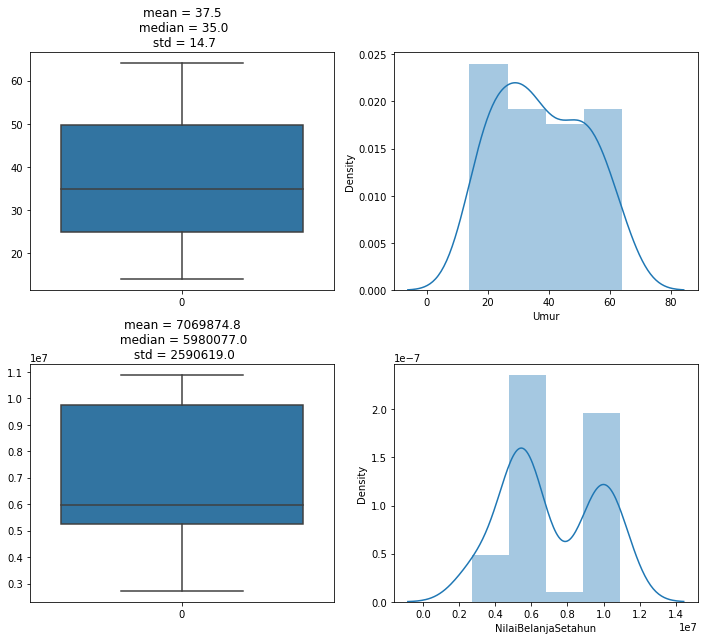

In [4]:
# Function to create a plot
def observe_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.1f\n median = %.1f\n std = %.1f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
 # Calling the function
numeric_col = ['Umur', 'NilaiBelanjaSetahun']
observe_num(numeric_col)

**Categorical Data Exploration**

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

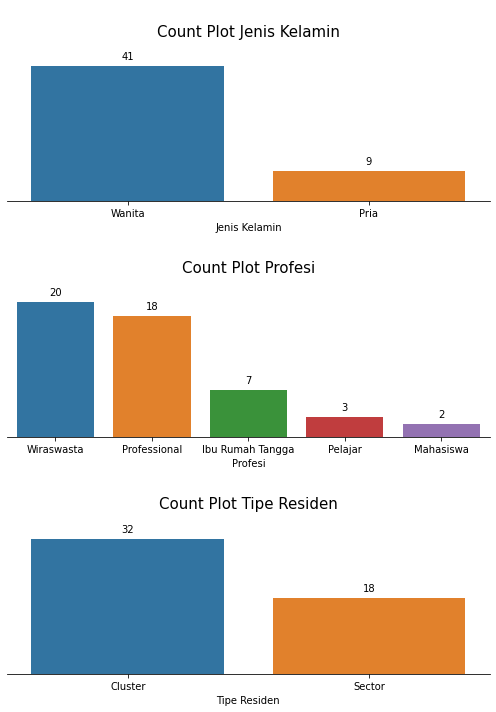

In [5]:
# Prepare for categorical column
categorical_col = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Create a canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

#  Create a plot for each categorical column  
for i, kol in enumerate(categorical_col):  
    # Create a plot
    sns.countplot(x = df[kol], data = df , order = df[kol].value_counts(ascending=False).index,  ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Annotate
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Showing plots
plt.show()

Insights :


*   The average age of customers is 37.5 years.
*   The average annual spending value of customers is 7,069,874.82
*   The gender of customers is dominated by women as many as 41 people (82%) and men as many as 9 people (18%).
*   The most common profession is self-employed (40%) followed by professional (36%) and others (24%).
*   Of all customers 64% of them live in Cluster and 36% live in Sector.



## Data Preparation

**Numerical Column Standardization**

In [8]:
from sklearn.preprocessing import StandardScaler 
numeric_col = ['Umur', 'NilaiBelanjaSetahun']

# Statistics before standardization
print('Statics Before Standardization')
print(df[numeric_col].describe().round(1))

# Standardization
df_std = StandardScaler().fit_transform(df[numeric_col])

# Create Data Frame
df_std = pd.DataFrame(data = df_std, index = df.index, columns=df[numeric_col].columns)

# Standardization Result
print ('\nStandardization Result')
print(df_std.head())

print('\nStatistics After Standardization')
print(df_std.describe().round(0))

Statics Before Standardization
       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0

Standardization Result
       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421

Statistics After Standardization
       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


**Categorical Data Conversion with Label Encoder**

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_col = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
df_encode = df[categorical_col].copy()

# Label Encoder for categorical columns
for col in categorical_col :
  df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


**Merging Data for Modeling**

In [10]:
# Merging Data Frame
df_model = df_encode.merge(df_std, left_index = True, right_index = True, how ='left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


## Modeling

**Finding the Optimal Number of Clusters**

Need to run the kprototypes algorithm with various numbers of clusters. Furthermore, you also save the cost value and visualize it with a line plot or point plot.

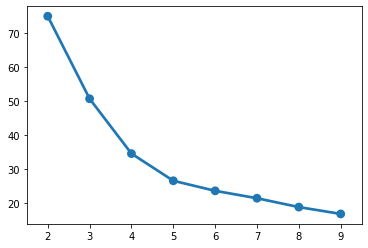

In [11]:
# Iterate to get cost value
cost = {}
for k in range (2, 10) :
  kproto = KPrototypes(n_clusters= k, random_state=75)
  kproto.fit_predict(df_model, categorical = [0,1,2])
  cost[k]=kproto.cost_

# Visualize Elbow Plot
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.show()

We can tell the elbow point of the plot is when k = 5. So we can use 5 as the optimal number of clusters.

**Modeling**

In [12]:
  kproto = KPrototypes ( n_clusters = 5, random_state = 75)  
  kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

# Define each customer segment    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Merging baseline data and customer segments    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())   


segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  cluster  
0       Sector              9497927        1  
1      Cluster              2722700        0  
2      Cluster              5286429        2  
3      Cluster              5204498        2  
4      Cluster             10615206        3  


In [13]:
# Display customer data based on the cluster
for i in range(0, 5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])



Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur    Profesi Tipe Residen  \
1     CUST-002  Shirley Ratuwati        Wanita    14    Pelajar      Cluster   
19    CUST-020    Irene Novianto        Wanita    16    Pelajar       Sector   
30    CUST-031     Eviana Handry        Wanita    19  Mahasiswa      Cluster   
32    CUST-033   Cecilia Kusnadi        Wanita    19  Mahasiswa      Cluster   
39    CUST-040    Irene Darmawan        Wanita    14    Pelajar       Sector   

    NilaiBelanjaSetahun  cluster  
1               2722700        0  
19              2896845        0  
30              3042773        0  
32              3047926        0  
39              2861855        0  

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0     CUST-001      Budi Anggara          Pria    58  Wiraswasta       Sector   
6     CUST-007     Cahyono, Agus          Pria    64  Wiraswasta       Sector   
12    CUST-013      

**Visualization of Clustering Results - Box Plot**

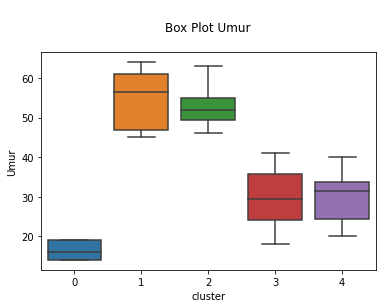

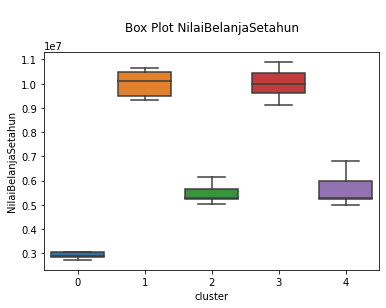

In [14]:
# Data Numerical
numeric_col = ['Umur','NilaiBelanjaSetahun']  
  
for i in numeric_col:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt. title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

**Visualization of Clustering Results - Count Plot**

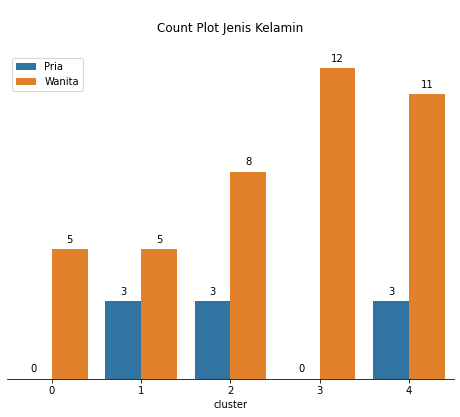

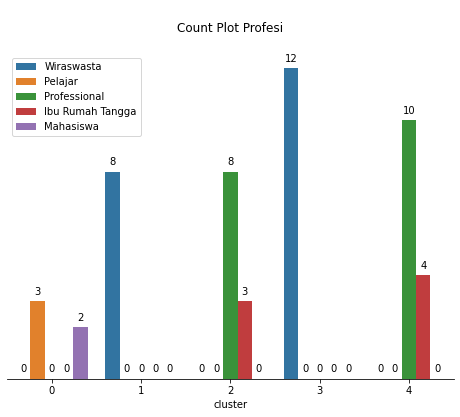

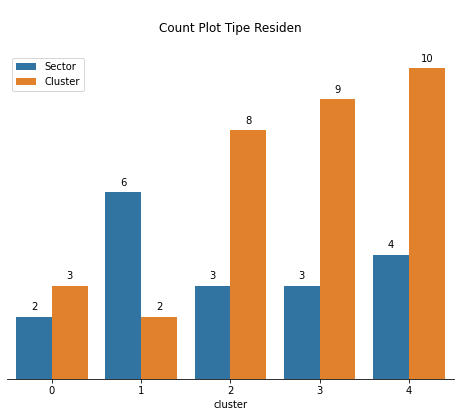

In [15]:
# Categorical data
categorical_col = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in categorical_col:  
    plt.figure(figsize=(8,6))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax.legend (loc="upper left")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


**Naming cluster**

In [16]:
# Mapping columns
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    

Insights :

*   Cluster 0  : Diamond Young Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. In addition, the contents of this cluster have an age of around 18 - 41 years with an average age of 29 years.
*   Cluster 1  : Diamond Senior Entrepreneur, the contents of this cluster are entrepreneurs who have an average transaction value of close to 10 million. The contents of this cluster have an age of about 45 - 64 years with an average age of 55 years.
*   Cluster 2  :  Silver Students, the contents of this cluster are students and college students with an average age of 16 years and an annual spending value of close to 3 million.
*   Cluster 3  : Gold Young Members, the contents of this cluster are young professionals and housewives with an age range of around 20 - 40 years and with an average age of 30 years and a yearly spending value of close to 6 million.
*   Cluster 4  : Gold Senior Member, the contents of this cluster are professionals and housewives who are old with an age range of 46 - 63 years old and with an average of 53 years old and their annual spending value is close to 6 million.









## Operating Model

The model that has been created must be able to be used daily to predict new data. For this reason, we must prepare the data again and then make predictions with the parameters and models that have been created.

In [17]:
# Creating new data
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      }]  

new_df = pd.DataFrame(data)  
print(new_df)

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  
0              8230000  


In [19]:
# Create Processing Data Function

clusters =  kproto.predict(df_model, categorical=[0,1,2]) 
df_final = df.copy()    
df_final['cluster'] = clusters 
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 

def data_preprocess(data):  
    # Convert Categorical data
    categorical_col = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[categorical_col].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardization of Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Merging Categorical and numerical data
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Execute function
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


**Calling the Model and Making Predictions**

In [22]:
def modelling (data):  
 # Call Model 
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Making Prediction
    clusters = kpoto.predict(data,categorical=[0,1,2])  
    return clusters  
  
# Run Function
clusters = modelling(new_df_model)  
  
print(clusters)  


[1]


**Naming Segments**

In [23]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member', 
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df) 

  Customer_ID Nama Pelanggan Jenis Kelamin  Umur     Profesi Tipe Residen  \
0    CUST-100           Joko          Pria    45  Wiraswasta      Cluster   

   NilaiBelanjaSetahun  cluster                 segmen  
0              8230000        1  Diamond Senior Member  
